## Arewa Data Science Academy
### Deep Learning Cohort1.0

#### Name: Muhammad Ibrahim Isah 
#### Email: muhammadibrahimisah0@gmail.com
#### Title: Week 3 Solution

### Exercises Solution

In [7]:
# Q1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt


NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

X[:5], y[:5]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483]]),
 array([1, 1, 1, 1, 0]))

In [8]:
df = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "y": y})
df.head()

,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


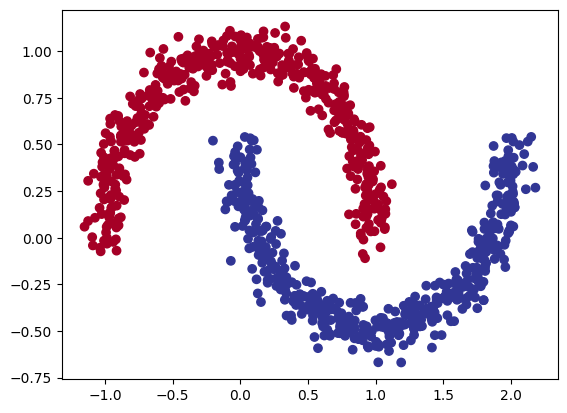

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [11]:
import torch
from sklearn.model_selection import train_test_split

In [14]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

/tmp/ipykernel_5223/336312613.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)
/tmp/ipykernel_5223/336312613.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [16]:
# Q2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=in_features, 
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, 
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

moon_model = MoonModelV0(in_features=2,out_features=1,hidden_units=10)
moon_model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [17]:
moon_model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.6186, -0.4930],
                      [ 0.6638,  0.5529],
                      [-0.6115, -0.2562],
                      [ 0.6611,  0.2267],
                      [-0.2633,  0.5744],
                      [-0.0620, -0.7052],
                      [-0.4281,  0.5747],
                      [-0.6931,  0.4808],
                      [ 0.3393, -0.1506],
                      [-0.2031,  0.6913]])),
             ('layer1.bias',
              tensor([ 1.9695e-01, -6.5167e-01,  4.1444e-01, -6.4566e-01, -4.8062e-01,
                      -1.9940e-01, -3.8578e-01, -2.9513e-01, -5.5887e-04, -1.3532e-02])),
             ('layer2.weight',
              tensor([[ 0.0224,  0.2697, -0.0799,  0.2686,  0.1935,  0.1343, -0.1689, -0.0208,
                        0.2610,  0.2091],
                      [ 0.0798,  0.3016,  0.2238,  0.1740, -0.2742,  0.1352,  0.0314, -0.2791,
                        0.3071, -0.1136],
                      [ 0.0190,  0.

In [25]:
# Q3 Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

loss_function = nn.BCEWithLogitsLoss() 

optimizer = torch.optim.SGD(params=moon_model.parameters(),lr=0.1)
     


In [26]:
# Q4 Create a training and testing loop to fit the model you created in 2 to the data you created in 1.

from torchmetrics import Accuracy

accuracy_function = Accuracy(task="multiclass", num_classes=2)
accuracy_function

MulticlassAccuracy()

In [27]:
torch.manual_seed(RANDOM_SEED)

epochs = 1000
for epoch in range(epochs):

  moon_model.train()

  y_logits = moon_model(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  loss = loss_function(y_logits, y_train) 
  acc = accuracy_function(y_pred, y_train.int()) 

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # test
  moon_model.eval() 

  with torch.inference_mode():
    # Make predictions
    test_logits = moon_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate loss    
    test_loss = loss_function(test_logits, y_test)
    # Calculate accuracy
    test_acc = accuracy_function(test_pred, y_test.int()) 

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} \t Loss: {loss:.2f} Acc: {acc:.2f} \t Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")
     

Epoch: 0 	 Loss: 0.68 Acc: 0.63 	 Test loss: 0.69 Test acc: 0.61
Epoch: 100 	 Loss: 0.38 Acc: 0.81 	 Test loss: 0.40 Test acc: 0.80
Epoch: 200 	 Loss: 0.22 Acc: 0.90 	 Test loss: 0.22 Test acc: 0.91
Epoch: 300 	 Loss: 0.16 Acc: 0.93 	 Test loss: 0.16 Test acc: 0.94
Epoch: 400 	 Loss: 0.11 Acc: 0.95 	 Test loss: 0.10 Test acc: 0.98
Epoch: 500 	 Loss: 0.07 Acc: 0.99 	 Test loss: 0.06 Test acc: 0.99
Epoch: 600 	 Loss: 0.04 Acc: 1.00 	 Test loss: 0.04 Test acc: 1.00
Epoch: 700 	 Loss: 0.03 Acc: 1.00 	 Test loss: 0.03 Test acc: 1.00
Epoch: 800 	 Loss: 0.02 Acc: 1.00 	 Test loss: 0.02 Test acc: 1.00
Epoch: 900 	 Loss: 0.02 Acc: 1.00 	 Test loss: 0.01 Test acc: 1.00


In [43]:
# Q5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.


def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two resources:
     1. The fast.ai machine learning course:
     2. CS231 course notes, Stanford University:
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                            torch.linspace(y_min, y_max, 100))
    
    
    # Create X value (we're going to make predictions on these)
    x_in = torch.stack([xx.ravel(), yy.ravel()], axis=1)

    # Make predictions
    y_pred = model(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = torch.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation")
        y_pred = torch.round(torch.sigmoid(y_pred)).reshape(xx.shape)

    # Plot decision boundary
    # plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    
    # modified y_pred to work with numpy arrays

    plt.contourf(xx, yy, y_pred.detach().numpy(), cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation
doing binary classifcation


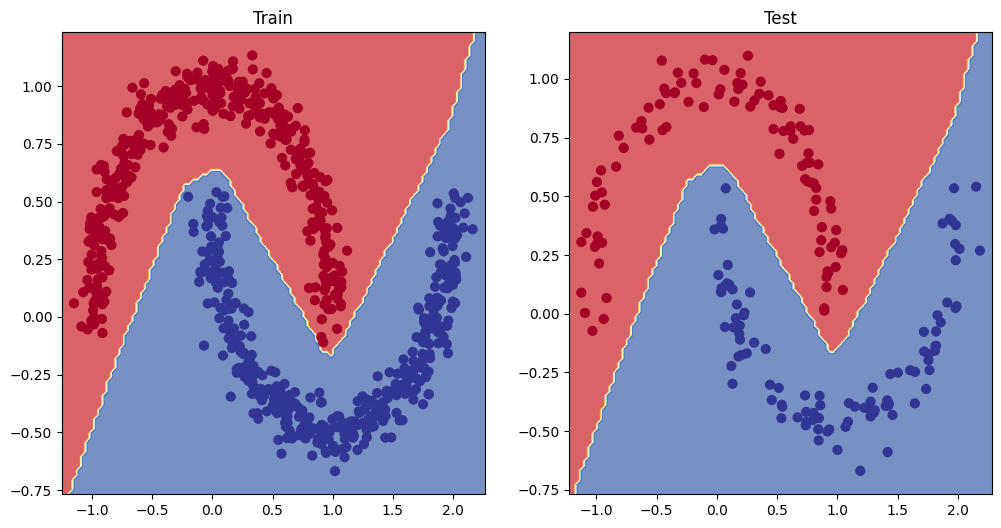

In [44]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moon_model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moon_model, X=X_test, y=y_test)
plt.show()


In [45]:
# Q6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

In [49]:
A = torch.arange(-100, 100, 1)

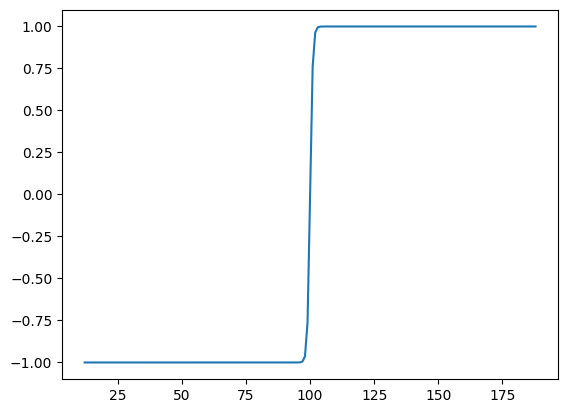

In [50]:
plt.plot(tanh(A))

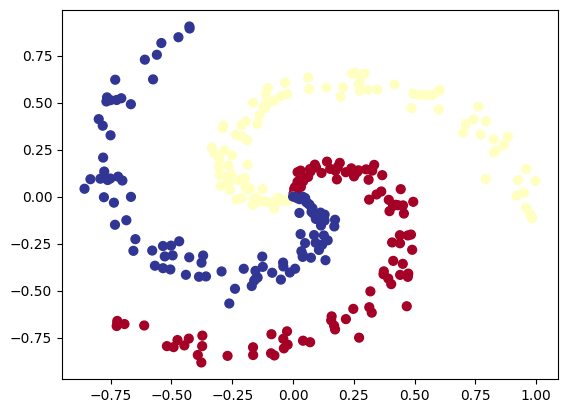

In [52]:
# Q7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [53]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.LongTensor)

# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)
     

(240, 60, 240, 60)

In [55]:
accuracy_function = Accuracy(task="multiclass", num_classes=3) 
accuracy_function

MulticlassAccuracy()

In [56]:
class SpiralModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=in_features, 
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, 
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
    
spiral_model = SpiralModel(in_features=2,out_features=3,hidden_units=10)
spiral_model

SpiralModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [57]:
print(spiral_model.state_dict())

OrderedDict([('layer1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802]])), ('layer1.bias', tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
         0.0667, -0.6984])), ('layer2.weight', tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
          0.0346, -0.0997],
        [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
          0.1606, -0.1927],
        [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
          0.2475, -0.2247],
        [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
         -0.1886, -0.1886],
        [ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,
          0.1132,  0.2628]

In [59]:
loss_function = nn.CrossEntropyLoss()          # loss function
optimizer = torch.optim.Adam(params=spiral_model.parameters(),lr=0.1) # optimizer

In [60]:
torch.manual_seed(RANDOM_SEED)
epochs = 1000
for epoch in range(epochs):

  spiral_model.train()

  y_logits = spiral_model(X_train)
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred_probs, dim=1)

  loss = loss_function(y_logits, y_train) 
  acc = accuracy_function(y_pred, y_train) 

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # test
  spiral_model.eval() 

  with torch.inference_mode():
    # Make predictions
    test_logits = spiral_model(X_test)
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    # Calculate loss    
    test_loss = loss_function(test_logits, y_test)
    # Calculate accuracy
    test_acc = accuracy_function(test_pred, y_test) 

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} \t Loss: {loss:.2f} Acc: {acc:.2f} \t Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")      
    

Epoch: 0 	 Loss: 1.12 Acc: 0.32 	 Test loss: 1.09 Test acc: 0.33
Epoch: 100 	 Loss: 0.08 Acc: 0.97 	 Test loss: 0.07 Test acc: 0.98
Epoch: 200 	 Loss: 0.05 Acc: 0.98 	 Test loss: 0.04 Test acc: 0.97
Epoch: 300 	 Loss: 0.05 Acc: 0.98 	 Test loss: 0.04 Test acc: 0.97
Epoch: 400 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.03 Test acc: 0.97
Epoch: 500 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.03 Test acc: 0.97
Epoch: 600 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.04 Test acc: 0.97
Epoch: 700 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.04 Test acc: 0.97
Epoch: 800 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.04 Test acc: 0.97
Epoch: 900 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.04 Test acc: 0.97


doing multiclass classification
doing multiclass classification


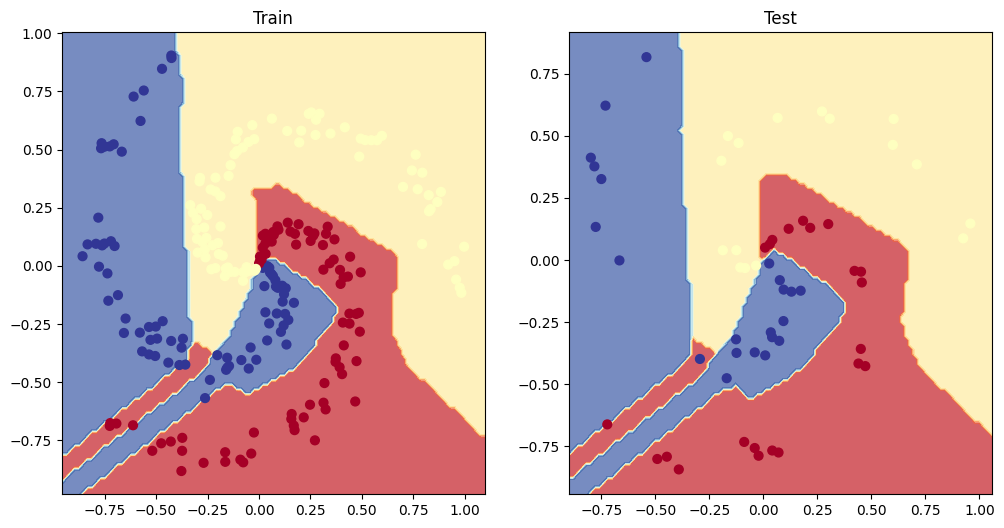

In [61]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")                  
plot_decision_boundary(spiral_model, X=X_train, y=y_train)  
plt.subplot(1, 2, 2)
plt.title("Test")

plot_decision_boundary(spiral_model, X=X_test, y=y_test)
plt.show()


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [ ]:
# Q3 Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)


In [ ]:

# Train the model for 300 epochs
torch.manual_seed(40)

epochs = 300


for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  # backpropagation
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():
      y_preds = model(X_test)
      test_loss = loss_fn(y_preds,y_test)
      print(f"Epoch: {epoch} \t Train loss: {loss:.3f} \t Test loss: {test_loss:.3f}")

Epoch: 0 	 Train loss: 0.133 	 Test loss: 0.154
Epoch: 20 	 Train loss: 0.123 	 Test loss: 0.143
Epoch: 40 	 Train loss: 0.114 	 Test loss: 0.132
Epoch: 60 	 Train loss: 0.104 	 Test loss: 0.121
Epoch: 80 	 Train loss: 0.095 	 Test loss: 0.110
Epoch: 100 	 Train loss: 0.086 	 Test loss: 0.099
Epoch: 120 	 Train loss: 0.076 	 Test loss: 0.088
Epoch: 140 	 Train loss: 0.067 	 Test loss: 0.077
Epoch: 160 	 Train loss: 0.057 	 Test loss: 0.066
Epoch: 180 	 Train loss: 0.048 	 Test loss: 0.055
Epoch: 200 	 Train loss: 0.039 	 Test loss: 0.044
Epoch: 220 	 Train loss: 0.029 	 Test loss: 0.033
Epoch: 240 	 Train loss: 0.020 	 Test loss: 0.023
Epoch: 260 	 Train loss: 0.010 	 Test loss: 0.012
Epoch: 280 	 Train loss: 0.007 	 Test loss: 0.005


In [ ]:
# Q4. Make predictions with the trained model on the test data

model.eval()

with torch.inference_mode():
  y_preds = model(X_test)
y_preds[:10],y.shape

(tensor([[0.9042],
         [1.1340],
         [1.0463],
         [1.1158],
         [0.9646],
         [1.1702],
         [0.9465],
         [1.1612],
         [0.9767],
         [0.9495]]),
 torch.Size([100, 1]))

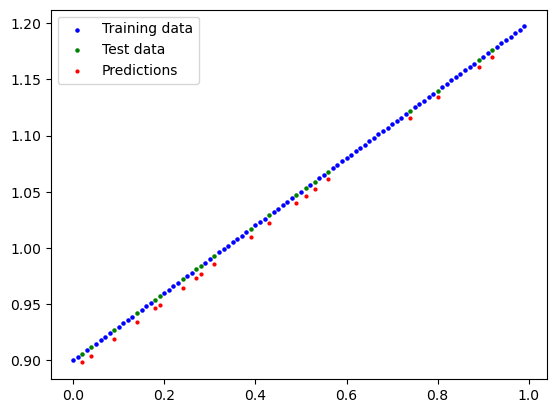

In [ ]:
# Plot the training and testing data 
def plot_predictions(X_train,y_train,X_test,y_test,predictions):
  plt.scatter(X_train,y_train,c = 'b',s = 5,label = "Training data")
  plt.scatter(X_test,y_test,c = 'g',s = 5,label = "Test data")
  plt.scatter(X_test,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend()
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [ ]:
# Q5. Save your trained model's `state_dict()` to file.

torch.save(model.state_dict(), "lr_model")
